# Nguyen Van Minh - 22003405

Cho DataSet lấy từ file C62.csv của các hộ gồm các trường sau:  
- MaLo: mã lô đất  
- MatTien: đường mặt tiền (m) 
- DienTich: diện tích lô đất (m vuông)  
- LoaiDat: loại đất  
- Loại đất: 1/ 2/ x (x là số năm)_ đất nông nghiệp, đất không thời hạn, đất có thời hạn.  

Dùng jupyter notebook (hoặc mã nguồn colab) để trả lời các câu hỏi sau.  (Đặt tên file: STT_HoVaTen_MSSV.ipynb và STT_HoVaTen_MSSV.pdf)

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

### Câu 1 (3.0 điểm): 
##### a. Đọc dữ liệu file trên vào DataFrame có tên df và hiển thị: 5 dòng đầu tiên, 5 dòng ngẫu nhiên, kích thước df, số dòng df, số cột df
##### b. Thống kê có bao nhiêu lô đất nông nghiệp và đất đất không thời hạn và vẽ biểu đồ pie minh họa.  
##### c. In ra giá trị thống kê trung bình (mean) diện tích cho các lô có thời hạn trên 10 năm  

In [73]:
# a
df = pd.read_csv('C62.csv')
print('*'*100)
print('5 dòng đầu tiên \n', df.head(5))
print('*'*100)
print('5 dòng ngẫu nhiên \n', df.sample(5))
print('*'*100)
print('kích thước \n', df.shape)
print('*'*100)
print('Số dòng \n', df.shape[0])
print('Số cột \n', df.shape[1])
print('*'*100)

****************************************************************************************************
5 dòng đầu tiên 
   MaLo  MatTien  DienTich  LoaiDat
0  Lô1        5       120        1
1  Lô2       10       200        2
2  Lô3        7       150       15
3  Lô4        8       180        1
4  Lô5        6       250        2
****************************************************************************************************
5 dòng ngẫu nhiên 
     MaLo  MatTien  DienTich  LoaiDat
5    Lô6        9       300       20
13  Lô14        9       210        2
4    Lô5        6       250        2
6    Lô7        4       100        1
19  Lô20        8       160        1
****************************************************************************************************
kích thước 
 (20, 4)
****************************************************************************************************
Số dòng 
 20
Số cột 
 4
*********************************************************************************

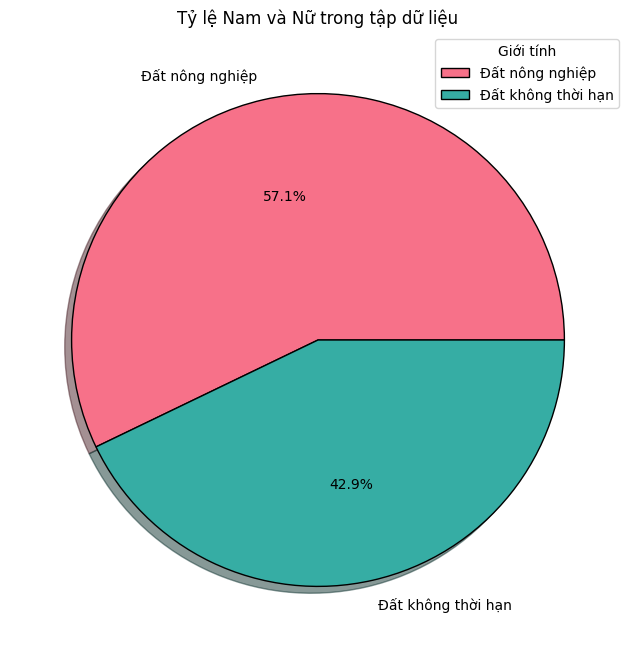

' Nhận xét\n    - Số lượng đất công nghiệp chiếm phần lớn trong tập dữ liệu\n'

In [74]:
# b.
dat_nong_nghiep = df[df['LoaiDat']==1]['LoaiDat'].count()
dat_khong_thoi_han = df[df['LoaiDat']==2]['LoaiDat'].count()
colors = sns.color_palette("husl", 2)

plt.figure(figsize=(8, 8))
plt.pie(
    [dat_nong_nghiep, dat_khong_thoi_han],
    labels=['Đất nông nghiệp', 'Đất không thời hạn'],
    autopct='%1.1f%%',
    shadow=True,
    # explode=explode,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Tỷ lệ Nam và Nữ trong tập dữ liệu")
plt.legend(title="Giới tính", loc="upper right")
plt.show()

""" Nhận xét
    - Số lượng đất công nghiệp chiếm phần lớn trong tập dữ liệu
"""

### Câu 2 (2.0 điểm):  Chèn thêm cột Tiền giá trị lô đất (TienGiaDat) (triệu) như sau: 
- Đất nông nghiệp: giá trị lô đất=Diện tích x 2;
- đất ở không xác định thời hạn: giá trị lô đất =Diện tích lô đất x mặt tiền2, 
- đất có thời hạn: ghi “Không xác định giá trị”; 

In [75]:
def tinhGiaDat(row):
    if row['LoaiDat'] == 1:
        return row['DienTich'] * 2
    if row['LoaiDat'] == 2:
        return row['DienTich'] * (row['MatTien']**2)
    else:
        return "Không xác định"
# Apply
df['TienGiaDat'] = df.apply(tinhGiaDat, axis=1) # axis=1/0: áp dụng theo cột/dòng
print(df)

    MaLo  MatTien  DienTich  LoaiDat      TienGiaDat
0    Lô1        5       120        1             240
1    Lô2       10       200        2           20000
2    Lô3        7       150       15  Không xác định
3    Lô4        8       180        1             360
4    Lô5        6       250        2            9000
5    Lô6        9       300       20  Không xác định
6    Lô7        4       100        1             200
7    Lô8        3        90        2             810
8    Lô9       12       400        1             800
9   Lô10       11       350       25  Không xác định
10  Lô11        5       220        2            5500
11  Lô12        6       270       30  Không xác định
12  Lô13        7       190        1             380
13  Lô14        9       210        2           17010
14  Lô15        8       230       10  Không xác định
15  Lô16       10       280        1             560
16  Lô17        4       130       35  Không xác định
17  Lô18        6       170        1          

### Cau 3. (2.0 diem)
- Chèn thêm cột tiền Chuyển đổi đất (ChuyenDoi)= Diện tích x 15 (triệu).
- Trong đó chỉ chuyển đỗi đất nông nghiệp (LoaiDat=1), các loại đất khác thì ghi "Chưa có công văn"  
- Hãy trích lọc ra các lô đất được phép chuyển đổi.

In [76]:
def chuyenDoiDat(row):
    if row['LoaiDat'] == 1:
        return row['DienTich'] * 15
    else:
        return "Chưa có công văn"
# Apply
df['ChuyenDoi'] = df.apply(chuyenDoiDat, axis=1) # axis=1/0: áp dụng theo cột/dòng
print(df.sample(5))
print('*'*100)
trich_loc = df[df['ChuyenDoi'] != 'Chưa có công văn']
print('Trích lọc ra các lô đất được phép chuyển đổi.\n', trich_loc)

    MaLo  MatTien  DienTich  LoaiDat TienGiaDat         ChuyenDoi
13  Lô14        9       210        2      17010  Chưa có công văn
8    Lô9       12       400        1        800              6000
15  Lô16       10       280        1        560              4200
0    Lô1        5       120        1        240              1800
12  Lô13        7       190        1        380              2850
****************************************************************************************************
Trích lọc ra các lô đất được phép chuyển đổi.
     MaLo  MatTien  DienTich  LoaiDat TienGiaDat ChuyenDoi
0    Lô1        5       120        1        240      1800
3    Lô4        8       180        1        360      2700
6    Lô7        4       100        1        200      1500
8    Lô9       12       400        1        800      6000
12  Lô13        7       190        1        380      2850
15  Lô16       10       280        1        560      4200
17  Lô18        6       170        1        340   

## Câu 4 (3.0 điểm): 
- a. Giả sử Diện tích có phân phối chuẩn. Hãy xây dựng hàm mật độ xác suất Diện tích 
- b. Vẽ đồ thị phân phối chuẩn cho Diện tích. Tinh chỉnh xlim, ylim cho đồ thị phù hợp 
- c. Cho biết bao nhiêu phần trăm lô đất có Diện tích dưới 120 (m vuông). bạn tạo cho tôi tập dữ liệu để tôi thử sức. bạn giải giúp tôi câu 1

In [77]:
# a.
# Hàm mật độ xs là pdf
# Hàm mật độ cần truyền là x, trung bình và độ lệch chuẩn
def ham_mat_do(x, mean, std):
    return norm.pdf(x, mean, std)

trung_binh = df['DienTich'].mean()
do_lech_chuan = df['DienTich'].std()
x = np.linspace(df['DienTich'].min(), df['DienTich'].max(), 100)
y = ham_mat_do(x, trung_binh, do_lech_chuan)

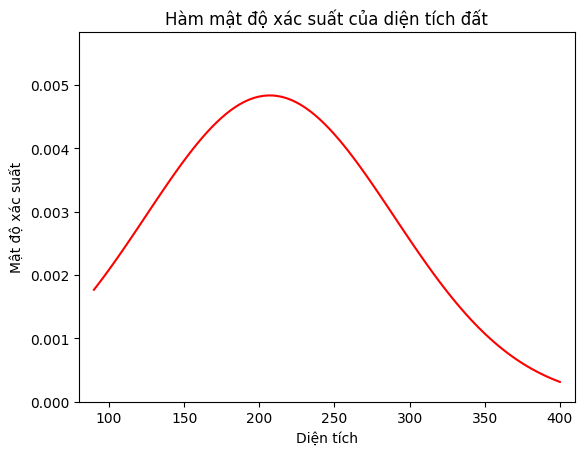

In [85]:
# b.
plt.plot(x, y, color='red')
plt.title('Hàm mật độ xác suất của diện tích đất')
plt.xlabel('Diện tích')
plt.ylabel('Mật độ xác suất')
plt.xlim(df['DienTich'].min() - 10, df['DienTich'].max() + 10)
plt.ylim(0, max(y) + 0.001)
plt.show()

In [86]:
dien_tich_duoi_120 = norm.cdf(120, trung_binh, do_lech_chuan)
print('Diện tích dưới 120 m^2 là: ', dien_tich_duoi_120)

Diện tích dưới 120 m^2 là:  0.14572448071186322
